<a href="https://colab.research.google.com/github/NipunFernando/Machine-Learning/blob/main/E18100_Tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Imports
import torch
import numpy as np

# Creating a tensor from a 2D array
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

# Creating a tensor from a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# Ceating a tensor from other tensors
x_ones = torch.ones_like(x_data) # Retains the properties of x_data (shape, datatype)
print(f"Ones tensor : \n {x_ones}\n")

x_rand = torch.rand_like(x_data, dtype = torch.float) # Overrides data type
print(f"Random tensor : \n {x_rand} \n")


shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")


tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


# We move our tensor to the GPU if available
if torch.cuda.is_available():
  print("Available (Cuda) GPU : Moving tensor to Cuda")
  tensor = tensor.to("cuda")

print(f"Device tensor is stored on: {tensor.device}")

#Standard numpy-like indexing and slicing
tensor = torch.rand(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"First column: {tensor[..., 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

#Standard numpy-like indexing and slicing
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)


print("Arithmetic Operations")
print("---------------------")
#Arithmetic operations
# This computes the matrix multiplication between two tensors.
# y1, y2, y3 will have the same value
# ‘‘tensor.T‘‘ returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)





Ones tensor : 
 tensor([[1, 1],
        [1, 1]])

Random tensor : 
 tensor([[0.1518, 0.9617],
        [0.9317, 0.7599]]) 

Random Tensor: 
 tensor([[0.2075, 0.3323, 0.4279],
        [0.6590, 0.4080, 0.5021]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Available (Cuda) GPU : Moving tensor to Cuda
Device tensor is stored on: cuda:0
First row: tensor([0.7045, 0.7485, 0.7644, 0.3506])
First column: tensor([0.7045, 0.3395, 0.1419, 0.5732])
First column: tensor([0.7045, 0.3395, 0.1419, 0.5732])
Last column: tensor([0.3506, 0.8378, 0.0401, 0.1189])
tensor([[0.7045, 0.0000, 0.7644, 0.3506],
        [0.3395, 0.0000, 0.1952, 0.8378],
        [0.1419, 0.0000, 0.2175, 0.0401],
        [0.5732, 0.0000, 0.8172, 0.1189]])
tensor([[0.7045, 0.0000, 0.7644, 0.3506],
        [0.3395, 0.0000, 0.1952, 0.8378],
        [0.1419

tensor([[119.3988, 116.6423, 111.3759, 117.7147],
        [116.6423, 114.5804, 108.9847, 114.8632],
        [111.3759, 108.9847, 104.0649, 109.8087],
        [117.7147, 114.8632, 109.8087, 116.1044]])

100%|██████████| 9912422/9912422 [00:00<00:00, 188516070.61it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 116588733.23it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 70082602.67it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17721422.11it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



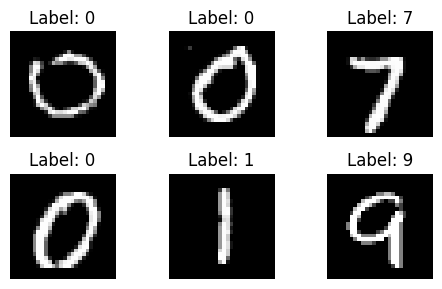

In [17]:
# Loading a Dataset
import torch
import torchvision
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms


train_dataset = torchvision.datasets.MNIST(
root='./data',
train=True,
download=True,
transform=transforms.ToTensor()
)


test_dataset = torchvision.datasets.MNIST(
root='./data',
train=False,
download=True,
transform=transforms.ToTensor()
)

# Iterating and Visualizing the Dataset
# Define a function to create a grid of images
def create_image_grid(images, labels, rows, cols):
  fig, axs = plt.subplots(rows, cols, figsize=(5, 3))
  for i in range(rows):
    for j in range(cols):
      axs[i, j].imshow(images[i*cols+j].squeeze(), cmap='gray')
      axs[i, j].set_title(f"Label: {labels[i*cols+j]}")
      axs[i, j].axis('off')
  plt.tight_layout()
  plt.show()

# Select a random subset of images and labels from the dataset
indices = np.random.choice(range(len(train_dataset)), size=6, replace=False)
images = [train_dataset[i][0] for i in indices]
labels = [train_dataset[i][1] for i in indices]
create_image_grid(images, labels, rows=2, cols=3)


In [29]:
# Preparing data for training with DataLoaders
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
n_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.01

# Data Loading
train_loader = DataLoader(
dataset=train_dataset,
batch_size=batch_size,
shuffle=True
)

test_loader = DataLoader(
dataset=test_dataset,
batch_size=batch_size,
shuffle=True
)

# network
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
    super(NeuralNet, self).__init__()
    self.linear_1 = nn.Linear(input_size, hidden_size)
    self.linear_2 = nn.Linear(hidden_size, n_classes)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.linear_1(x))
    x = self.linear_2(x)
    return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # for cuda
#device = torch.device,('mps' if torch.backends.mps.is_available() else 'cpu') # for mps
print(f'Using {device} device')





model = NeuralNet(input_size, hidden_size, n_classes).to(device)
print(model)



# Initialize the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


# Train Loop
n_steps = len(train_loader)
for epoch in range(n_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(images.shape[0], -1).to(device)
    labels = labels.to(device)
    # forward pass and loss
    outputs = model(images)
    loss = criterion(outputs, labels)
    # backward pass and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0:
      print(f'epoch {epoch+1}/{n_epochs},\
      step {i+1}/{n_steps}, loss = {loss.item():.4f}')



# Test Loop
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(images.shape[0], -1).to(device)
    labels = labels.to(device)
    outputs = model(images)
    # value, index(cls_label)
    _, predictions = torch.max(outputs, dim=1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item() 
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')



Using cuda device
NeuralNet(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=10, bias=True)
  (relu): ReLU()
)
epoch 1/2,      step 100/600, loss = 0.5629
epoch 1/2,      step 200/600, loss = 0.4913
epoch 1/2,      step 300/600, loss = 0.3608
epoch 1/2,      step 400/600, loss = 0.3261
epoch 1/2,      step 500/600, loss = 0.3495
epoch 1/2,      step 600/600, loss = 0.3251
epoch 2/2,      step 100/600, loss = 0.2876
epoch 2/2,      step 200/600, loss = 0.4255
epoch 2/2,      step 300/600, loss = 0.3870
epoch 2/2,      step 400/600, loss = 0.2300
epoch 2/2,      step 500/600, loss = 0.3584
epoch 2/2,      step 600/600, loss = 0.3777
accuracy = 92.78


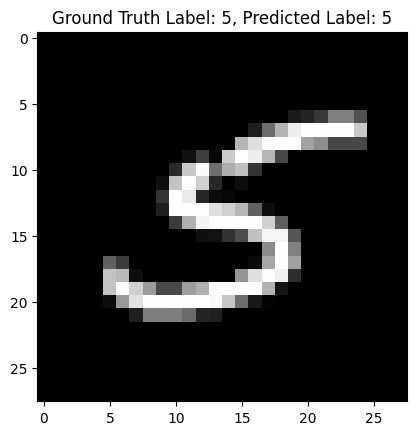

In [23]:
# Inference the model
# Get a test image from the dataset
test_image, test_label = next(iter(test_loader))
test_image, test_label = test_image.to(device), test_label.to(device)

# Select a single image from the batch
image_idx = 0
test_image = test_image[image_idx].unsqueeze(0)
test_label = test_label[image_idx].unsqueeze(0)

# Make a prediction
with torch.no_grad():
  model.eval()
  output = model(test_image.view(-1, 784))
  _, predicted = torch.max(output.data, dim=1)

# Plot the image with ground truth and predicted labels
plt.imshow(test_image.cpu().view(28, 28), cmap='gray')
plt.title(f"Ground Truth Label: {test_label.item()}, \
Predicted Label: {predicted.item()}")
plt.show()

In [25]:
# Saving and Loading Model Weights
import torchvision.models as models
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 239MB/s]


In [26]:
model = models.vgg16() # we do not specify weights, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [27]:
# Saving and Loading Models with Shapes
torch.save(model, 'model.pth')

In [28]:
# We can then load the model like this
model = torch.load('model.pth')